# Important probe plots - what is the methylation distribution?

In [1]:
# first, get all important probes - lets pick the intersecting probes from all 4 models
import pandas as pd
important_probes = pd.read_table('../figs_xgboost/xgboost_models/intersected_features.bed', header=None)
important_probes.columns = ['seqnames', 'start', 'end', 'mean_importance']
important_probes['start'] = important_probes['start'] + 1 # it is a bed file, so we need to add 1 to make 1-indexed again
important_probes['end'] = important_probes['end'] + 1



In [2]:
# now lets read in the methylation data (m values)
import numpy as np

processed_data = pd.read_csv('../data/training_testing_maxgap_50_newdata_processed_m_vals.csv', index_col=0)
processed_data
diagnoses = pd.read_csv('../data/training_testing_diagnoses_maxgap_50_newdata.csv', sep = ',')
diagnoses = diagnoses.iloc[2:, ]
diagnoses['pooled_labels'] = np.array([4 if d == 5 else d for d in diagnoses['overallpath']])


/home/in268/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,seqnames,start,X9970497093_R05C01,X9970497093_R06C01,X9970497093_R01C02,X9970497093_R02C02,X9761749116_R03C01,X9761749116_R04C01,X9761749116_R05C01,X9761749116_R06C01,...,X5014.T1,X6265.T4,X6026.N1,X6026.T1,X6287.N1,X6287.T1,X6261.N1a,X6261.T1a,X7044.T1,X7168.T1
0,16,53434200,2.565985,-0.450217,-0.323000,2.709758,0.007133,2.556097,3.249638,-1.570050,...,-2.627359,-0.939479,-1.618512,-2.198782,-1.404067,-1.495102,-1.618897,-7.607330,-3.951456,-4.626326
1,6,25282551,5.712430,2.460266,5.063083,5.094526,4.999244,2.148402,5.005720,4.975759,...,4.203872,11.321364,3.459432,6.845490,4.141774,4.081746,3.785863,0.343954,5.456023,-0.298198
2,3,129183534,-4.556710,-4.492022,-4.331791,-4.558498,-4.252774,-4.093210,-3.939161,-4.747895,...,-12.475987,-8.124121,-12.475987,-8.527477,-12.475987,-7.312883,-6.475733,NaN,-12.475987,-5.252871
3,12,123601930,-4.394262,-4.734221,-4.782092,-5.033645,-4.922612,-4.923191,-5.292045,-4.878823,...,-6.487605,-7.815492,-6.636644,-6.608686,-6.612504,-6.909444,-7.780048,-6.674623,-8.099315,-6.332948
4,15,59493107,-4.984942,-4.653506,-4.673874,-4.489908,-4.789911,-4.680833,-4.423879,-5.063082,...,-12.475987,-4.643856,-12.475987,-7.076816,-12.475987,-5.807355,-12.475987,-6.584963,-6.189825,-12.475987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158665,2,227460160,-3.765403,-3.858526,-3.659068,-3.695701,-3.318508,-3.488807,-2.979172,-3.957662,...,-4.392317,1.459432,0.415037,NaN,NaN,-12.475987,1.584963,NaN,NaN,NaN
158666,2,47206143,-4.708080,-4.154232,-5.386126,-4.436657,-5.713464,-4.856465,-5.330443,-5.758850,...,5.440808,5.073249,3.874807,6.794416,4.777723,4.446256,5.024303,4.494317,4.129283,5.882643
158667,2,65612270,-5.924421,-5.753293,-6.190372,-6.181880,-6.217659,-6.449907,-6.253286,-6.399058,...,3.263509,7.159871,11.321364,6.094972,11.321364,4.590877,2.874469,11.321364,2.135481,11.321364
158668,7,22665906,-5.996745,-6.145695,-6.778679,-6.618655,-6.524387,-6.589506,-6.750802,-6.710793,...,5.954196,4.591482,5.129283,11.321364,4.426265,2.367371,NaN,11.321364,3.863498,11.321364


In [3]:
important_probes['seqnames'] = important_probes['seqnames'].astype(str)
important_probes['start'] = important_probes['start'].astype(str)

processed_data['seqnames'] = processed_data['seqnames'].astype(str)
processed_data['start'] = processed_data['start'].astype(str)

In [5]:
# now only keep important probes

processed_data_important = processed_data[(processed_data['seqnames'].isin(list(important_probes['seqnames']))) & (processed_data['start'].isin(list(important_probes['start'])))]

processed_data_important_locs = processed_data_important[['seqnames', 'start']]
processed_data_important_locs

processed_data_important = processed_data_important.iloc[:,2:]
processed_data_important

,seqnames,start
4792,2,241268505
6633,20,51750302
8438,19,17405661
14373,11,46392919
16728,7,76409891
19512,3,9204817
23654,19,2244197
23766,3,190319906
35431,5,115545018
36516,3,105368398


,X9970497093_R05C01,X9970497093_R06C01,X9970497093_R01C02,X9970497093_R02C02,X9761749116_R03C01,X9761749116_R04C01,X9761749116_R05C01,X9761749116_R06C01,X9761749116_R01C02,X9761749116_R02C02,...,X5014.T1,X6265.T4,X6026.N1,X6026.T1,X6287.N1,X6287.T1,X6261.N1a,X6261.T1a,X7044.T1,X7168.T1
4792,-2.952653,-2.867944,-1.971518,-3.317772,-3.121913,-3.121473,-1.145321,-4.374165,-3.430546,-2.586925,...,0.834414,3.187627,1.000000,2.102362,NaN,NaN,0.612518,NaN,2.930343,-3.169925
6633,-5.319228,-3.731840,-5.428349,-4.938559,-5.537038,-5.319379,-5.193842,-5.586706,-4.405481,-5.260707,...,-1.373745,-5.604338,-2.974294,-2.914533,-2.527054,-0.128967,-4.496771,-12.475987,-2.709129,-5.118941
8438,-3.720638,-2.929747,-4.998961,-2.778873,-0.217647,-0.510385,-4.688095,0.191052,-0.312320,-4.846480,...,-5.260528,1.196560,-1.389166,-0.118105,-1.104311,-12.475987,-2.225008,-7.294621,1.695085,-2.392317
14373,-3.927239,-5.429009,-5.353689,-5.105443,-5.605690,-5.524950,-5.817275,-5.545379,-5.736785,-5.668044,...,-6.076351,-4.834475,-3.240810,-3.573776,-4.501912,-6.843513,-4.409036,-5.523454,-3.968091,-12.475987
16728,-0.687193,0.123092,-1.964808,-1.538387,-1.600733,-0.352921,-2.206955,-1.399917,-1.705453,0.109131,...,4.249992,5.247928,0.048654,5.849666,0.283263,3.141497,-0.525412,-2.369708,4.406270,-1.714916
19512,-1.019349,-0.386939,-2.443436,-1.528388,-3.117739,1.106666,-1.721068,-1.857466,-1.905046,-1.187301,...,3.044816,4.658897,-0.040842,3.762422,-0.000642,3.244785,0.104822,-4.240500,4.743844,-0.428343
23654,6.137778,5.938152,5.902088,5.232427,5.117985,5.767692,6.198389,6.434084,5.547854,5.047045,...,3.682957,-1.359061,1.714142,-0.949025,2.082790,4.677368,0.232111,6.549233,-2.107869,5.159254
23766,4.881633,5.201880,4.416826,4.429948,3.874627,3.933792,4.771722,3.709216,4.370996,5.065628,...,2.142728,-2.065291,1.517848,-1.021130,1.754888,3.552078,2.052211,7.118941,-2.528567,-0.806685
35431,-3.547640,-3.516100,-2.950202,-4.140960,-4.416826,-3.777559,-1.879451,-3.318506,-4.207447,-3.793137,...,-12.475987,-12.475987,-12.475987,-12.475987,-12.475987,-12.475987,-6.087463,NaN,-12.475987,-4.318742
36516,-1.754068,-1.270525,-2.130432,-4.996140,-4.592341,0.208841,-0.041721,0.828779,-1.198711,-1.080746,...,-12.475987,-6.424528,-3.910648,-12.475987,-3.421927,-7.994353,-2.929677,-0.136959,-12.475987,-12.475987


In [6]:
# now get data in long format, including diagnoses

# add diagnoses
processed_data_important.loc['diagnoses'] = list(diagnoses['pooled_labels'])

processed_data_important = processed_data_important.transpose()
processed_data_important['id'] = processed_data_important.index

processed_data_important = processed_data_important.melt(id_vars=['id', 'diagnoses'])

processed_data_important

,id,diagnoses,variable,value
0,X9970497093_R05C01,3.0,4792,-2.952653
1,X9970497093_R06C01,3.0,4792,-2.867944
2,X9970497093_R01C02,3.0,4792,-1.971518
3,X9970497093_R02C02,3.0,4792,-3.317772
4,X9761749116_R03C01,3.0,4792,-3.121913
...,...,...,...,...
46659,X6287.T1,2.0,157449,-9.066089
46660,X6261.N1a,0.0,157449,-0.034976
46661,X6261.T1a,4.0,157449,0.747897
46662,X7044.T1,4.0,157449,-1.930954


In [9]:
processed_data_important['variable'].unique()

array([4792, 6633, 8438, 14373, 16728, 19512, 23654, 23766, 35431, 36516,
       45652, 45984, 46608, 49301, 51912, 58616, 60786, 62180, 63697,
       69324, 77596, 80154, 80213, 88279, 91489, 93200, 108577, 111199,
       117516, 118600, 125770, 143726, 144228, 144769, 147538, 151775,
       153391, 157449], dtype=object)

In [11]:
# get genes (if any) feature maps to
features_to_genes = pd.read_csv('../figs_xgboost/xgboost_models/0_features_mapped_to_genes.csv') # as features are in all models, can just get the first model
features_to_genes['seqnames'] = features_to_genes['seqnames'].astype(str)
features_to_genes['start'] = features_to_genes['start'].astype(str)
features_to_genes['gene_name'] = features_to_genes['gene_name'].fillna(features_to_genes['ensembl_gene_id']) # where gene_name is nan, fill with ensembl id
# features_to_genes

def get_genes_for_feature(feature):
    seqname = processed_data.loc[feature]['seqnames']
    start = processed_data.loc[feature]['start']

    genes_df = features_to_genes[(features_to_genes['seqnames'] == seqname) & (features_to_genes['start'] == start)]

    genes = list(genes_df['gene_name'])
    return(genes)


# feature = 117516
# get_genes_for_feature(feature)
# feature = 91489
# get_genes_for_feature(feature)
# feature = 46608
# get_genes_for_feature(feature)


In [12]:
# get importances of all features and put in order of importance (descending)

features_and_imps = {}
for feature in processed_data_important['variable'].unique():
    importance = important_probes[(important_probes['seqnames'] == processed_data.loc[feature]['seqnames']) & (important_probes['start'] == processed_data.loc[feature]['start'])]['mean_importance'].item()
    features_and_imps[feature] = importance
    
feature_and_imps = sorted(features_and_imps.items(), key=lambda x: x[1], reverse=True) # sort by value
sorted_features = [f_and_i[0] for f_and_i in feature_and_imps]

In [13]:
# now to plot, one boxplot per feature
import matplotlib.pyplot as plt
import seaborn as sb

fig = plt.figure(figsize=(20, 40))
fig.subplots_adjust(hspace=0.75, wspace=0.3)


for i, feature in enumerate(sorted_features):

    to_plot = processed_data_important[processed_data_important['variable'] == feature]
    
    su = plt.subplot(8, 5, i+1)
    sp = sb.swarmplot(data = to_plot, x = 'diagnoses', y = 'value', s=1, ax=su, palette = ["#56B4E9", "#007d5b", "#000000", "#D55E00", "#CCBB44"])
#     sp = sb.stripplot(data = to_plot, x = 'diagnoses', y = 'value', s=1, ax=su, palette = ["#56B4E9", "#007d5b", "#000000", "#D55E00", "#CCBB44"])
    yl = plt.ylabel('')
    xl = plt.xlabel('')
    position = 'chr ' + processed_data.loc[feature]['seqnames'] + ':' + processed_data.loc[feature]['start']
    genes = get_genes_for_feature(feature)
    if genes != []:
        position = position + ' (' + ', '.join(genes) + ')'
    t = plt.title(position)
    xt = plt.xticks([0,1,2,3,4], ['normal','ccRCC', 'chRCC', 'onc', 'pRCC'])


plt.savefig('important_probes_and_methylation.pdf', bbox_inches='tight')



/home/in268/.local/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 14.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/in268/.local/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/in268/.local/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 23.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/in268/.local/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/in268/.local/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 

### Making mini gene plots to tell where the CpGs are relative to the gene

This code is (quite heavily) adapted from Junfan Huang's code he very kindly sent me.

In [14]:

def feature_plot_on_genes(gene_name, cpg_start_pos, axis):
    '''input the gene's name and reture the TIP results'''
    if type(gene_name) == str: # if just one gene
        try:
            gene_info = features_to_genes[features_to_genes['gene_name'] == gene_name][['seqnames', 'feature.ranges.start', 'feature.ranges.end', 'feature.strand']]
            gene_info = gene_info.drop_duplicates()
            chr_loc = gene_info['seqnames'].item()
            start = gene_info['feature.ranges.start'].item()
            end = gene_info['feature.ranges.end'].item()
            strand = gene_info['feature.strand'].item()
   
            cpg_loc = int(cpg_start_pos)

        except:
            print('Please double check your gene name')
            return None
    else: # multiple genes
        gene_infos = []
        title = gene_name.copy()
        gene_name.reverse() # reverse, so we display genes in order from top to bottom (instead of bottom to top)
        for g in gene_name:
            gene_info = features_to_genes[features_to_genes['gene_name'] == g][['seqnames', 'feature.ranges.start', 'feature.ranges.end', 'feature.strand']]
            gene_info = gene_info.drop_duplicates()
            chr_loc = gene_info['seqnames'].item()
            start = gene_info['feature.ranges.start'].item()
            end = gene_info['feature.ranges.end'].item()
            strand = gene_info['feature.strand'].item()
            
            gene_infos.append({'chr_loc': chr_loc, 'start': start, 'end': end, 'strand': strand})
            
            cpg_loc = int(cpg_start_pos)

        
    if type(gene_name) == str: # if just one gene
        max_v = 1
        plt.fill_betweenx([0, max_v], start, end, alpha=0.1)
        if strand == '-': # TSS is at end
            gene_len = end - start
            plt.vlines(end, max_v, 0, colors="blue", linestyles="dashed", linewidth=1) # TSS location
            plt.arrow(end, 0, -(gene_len/10), 0.001, color='blue', head_width=0.2, head_length=gene_len/30, linestyle="dashed")
            plt.text(end, max_v+0.05, 'TSS', color='blue', ha='center')
        else:
            gene_len = end - start
            plt.vlines(start, max_v, 0, colors="blue", linestyles="dashed", linewidth=1) # TSS location
            plt.arrow(start, 0, gene_len/10, 0.001, color='blue', head_width=0.2, head_length=gene_len/30, linestyle="dashed")
            plt.text(start, max_v+0.05, 'TSS', color='blue', ha='center')
        axis.text(cpg_loc, 0.65, 'feature', ha='center', color='red', size=11)
        axis.scatter([cpg_loc], [0.5], c='red', zorder=3)
        axis.set_title(gene_name)
        ax = axis
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        plt.setp(ax.get_yticklabels(), visible=False)
        plt.setp(ax.get_yticklines(), visible=False)
        ax.locator_params(nbins=4)
        ax.ticklabel_format(style='plain', useOffset=False)
        
    
    else: # if multiple genes
        
        for i in range(len(gene_name)): # for each gene
            start = gene_infos[i]['start']
            end = gene_infos[i]['end']
            strand=gene_infos[i]['strand']
            
            max_v = i+1
            plt.fill_betweenx([i, max_v], start, end, alpha=0.1)
            if strand == '-': # TSS is at end
                gene_len = end - start

                plt.vlines(end, max_v, i, colors="blue", linestyles="dashed", linewidth=1) # TSS location
                plt.arrow(end, i, -(gene_len/10), 0.001, color='blue', head_width=0.2, head_length=gene_len/30, linestyle="dashed")
                plt.text(end, max_v+0.05, 'TSS', color='blue', ha='center')
            else:
                gene_len = end - start
                plt.vlines(start, max_v, i, colors="blue", linestyles="dashed", linewidth=1) # TSS location
                plt.arrow(start, i, gene_len/10, 0.001, color='blue', head_width=0.2, head_length=gene_len/30, linestyle="dashed")
                plt.text(start, max_v+0.05, 'TSS', color='blue', ha='center')
        
        # now plot the feature:
        axis.text(cpg_loc, 0.35, 'feature', ha='center', color='red', size=11)
        axis.scatter([cpg_loc], [1], c='red', zorder=3)
        axis.set_title(', '.join(title))
        
        ax = axis
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        plt.setp(ax.get_yticklabels(), visible=False)
        plt.setp(ax.get_yticklines(), visible=False)
        ax.locator_params(nbins=5)
        ax.ticklabel_format(style='plain', useOffset=False)
        
                

In [15]:
# feature_plot_on_genes(['SCIRT', 'ENSG00000231881'], '44063255')


# feature_plot_on_genes('SF3A2', '2244197')

# feature_plot_on_genes('TESC', '117048359')

### Now plotting feature swarm plots with gene plots

/home/in268/.local/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 6.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/in268/.local/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/in268/.local/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 13.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/in268/.local/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/in268/.local/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 5

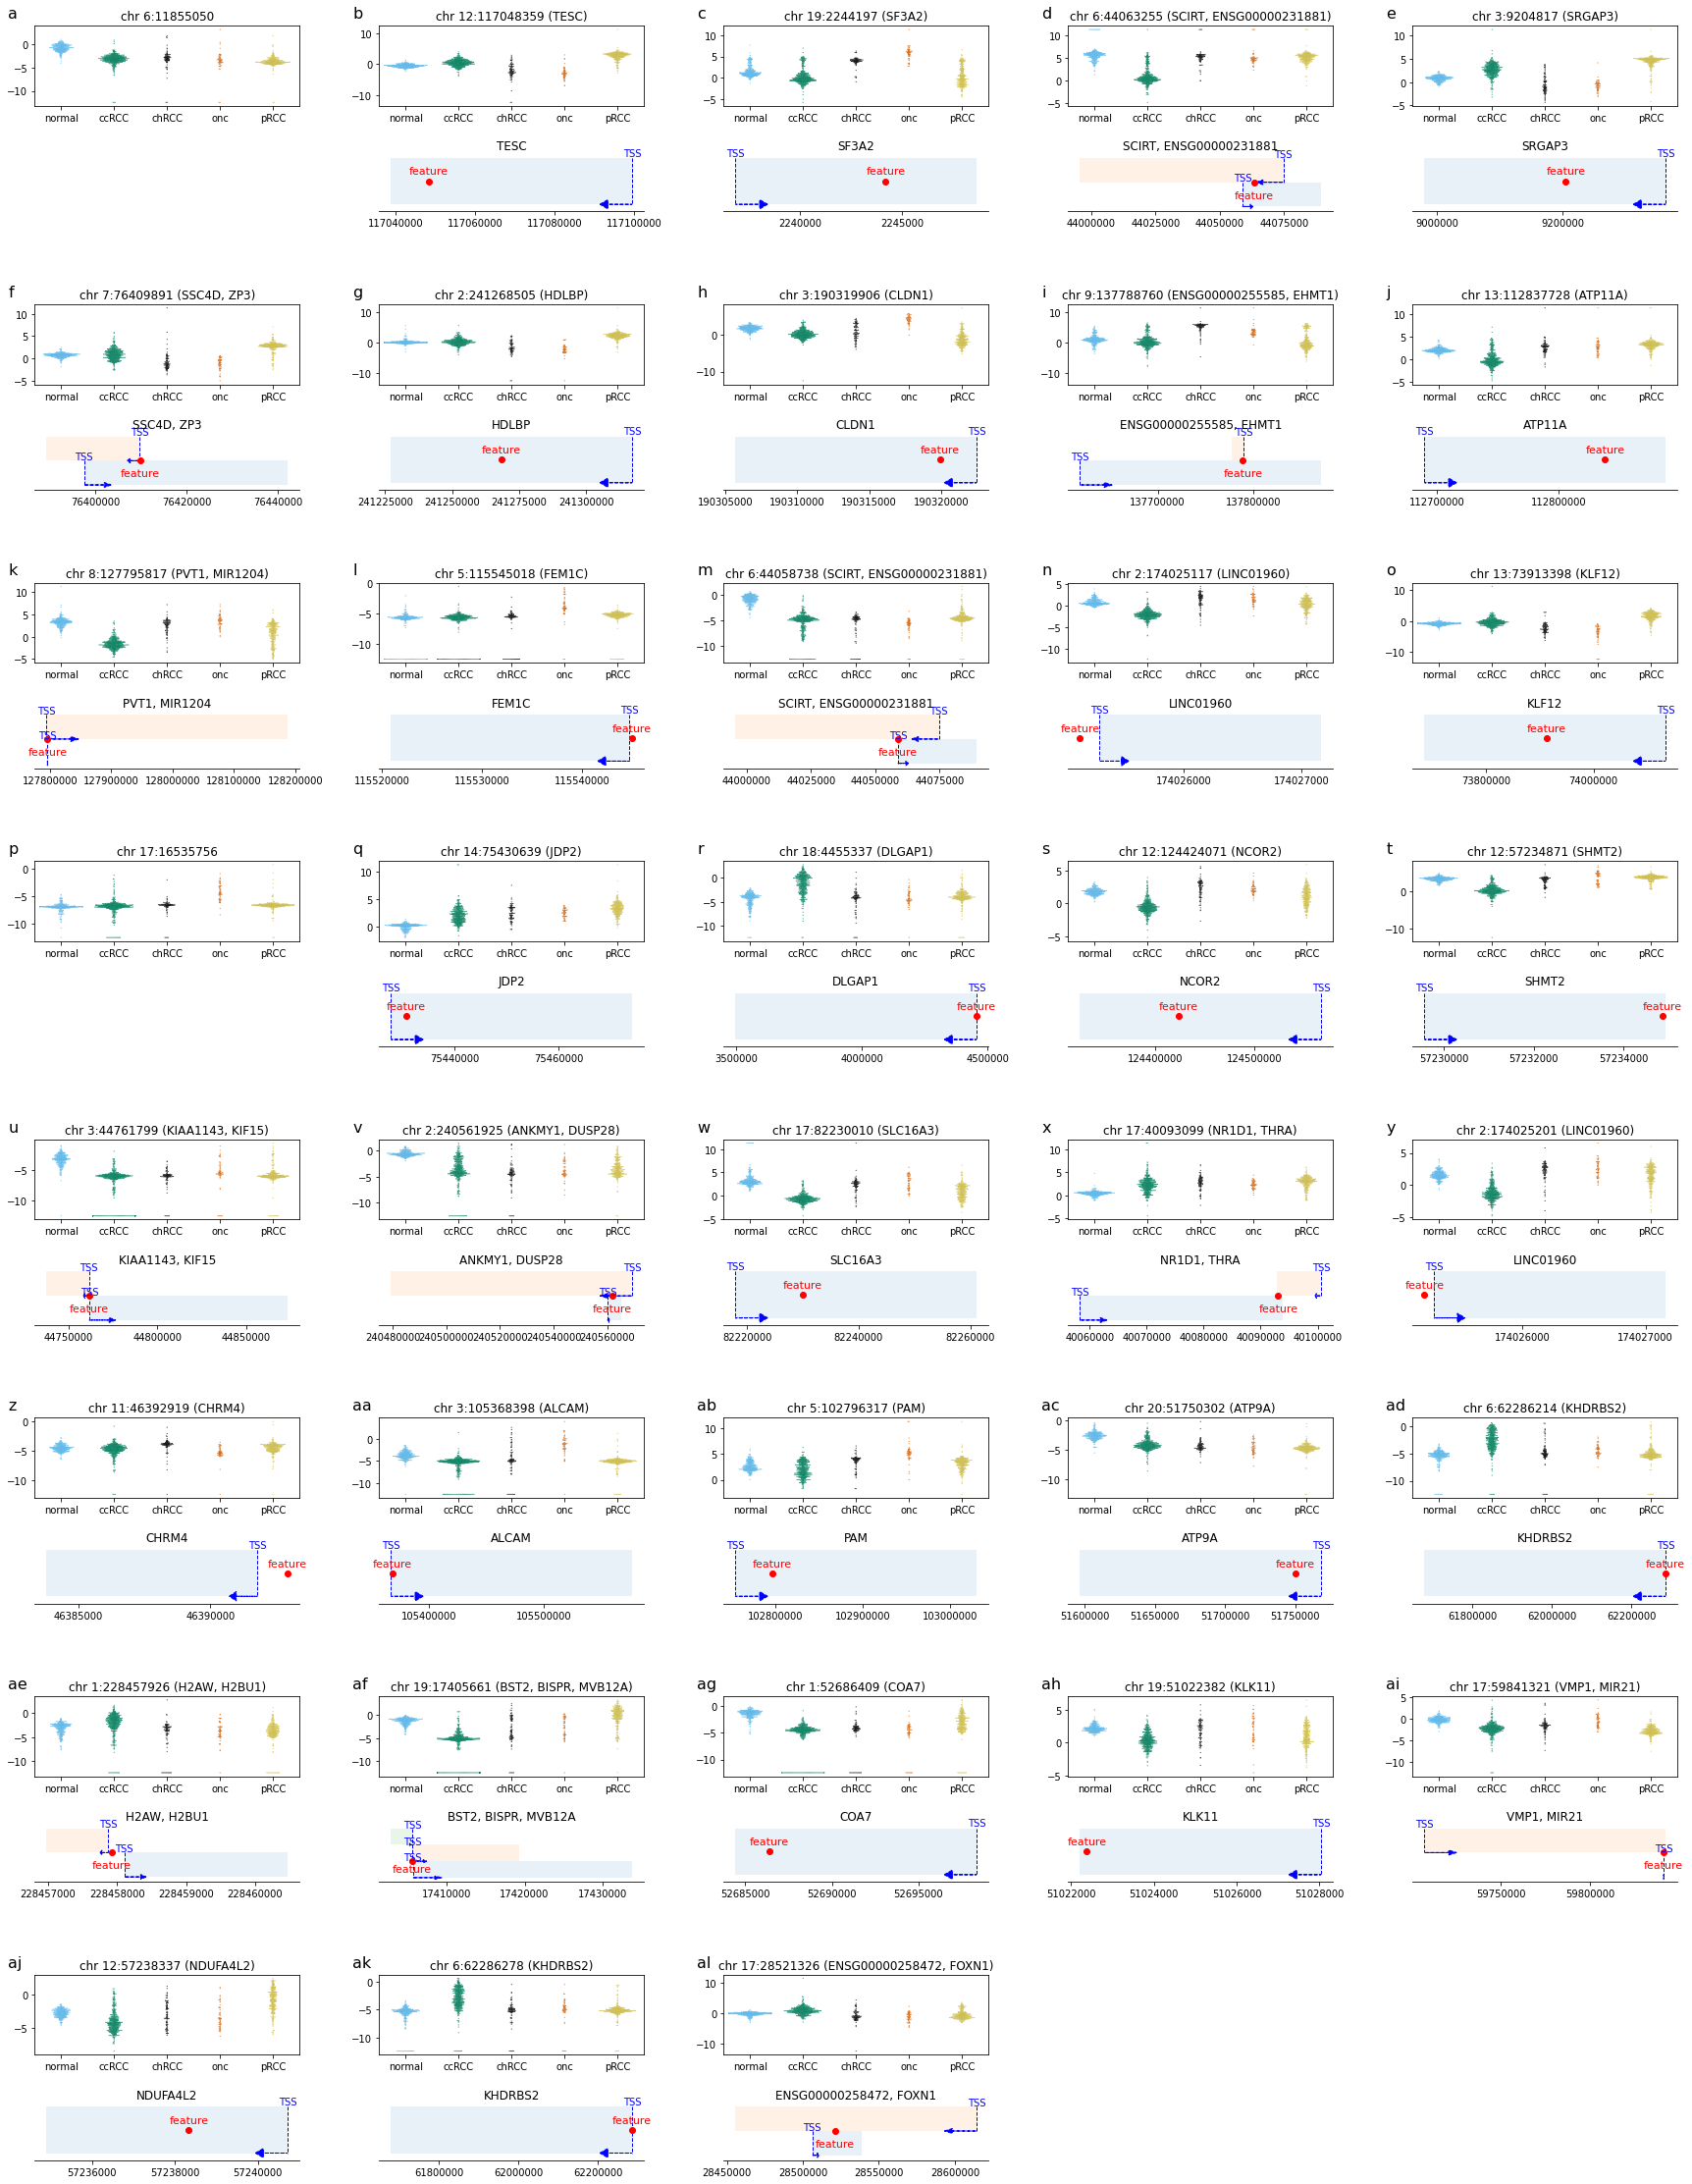

In [18]:
# now to plot, one boxplot per feature
import matplotlib.pyplot as plt
import seaborn as sb

from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = plt.figure(figsize=(30, 40))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

subplot_labels = [chr(i) for i in range(97, 97+26)] + ['a' + chr(i) for i in range(97, 97+26)] # a..z and then aa, ab, .., az

for i, feature in enumerate(sorted_features):

    to_plot = processed_data_important[processed_data_important['variable'] == feature]
    
    su = plt.subplot(8, 5, i+1)
    sp = sb.swarmplot(data = to_plot, x = 'diagnoses', y = 'value', s=1, ax=su, palette = ["#56B4E9", "#007d5b", "#000000", "#D55E00", "#CCBB44"])
#     sp = sb.stripplot(data = to_plot, x = 'diagnoses', y = 'value', s=1, ax=su, palette = ["#56B4E9", "#007d5b", "#000000", "#D55E00", "#CCBB44"])
    yl = plt.ylabel('')
    xl = plt.xlabel('')
    position = 'chr ' + processed_data.loc[feature]['seqnames'] + ':' + processed_data.loc[feature]['start']
    genes = get_genes_for_feature(feature)
    if genes != []:
        position = position + ' (' + ', '.join(genes) + ')'
    t = plt.title(position)
    xt = plt.xticks([0,1,2,3,4], ['normal','ccRCC', 'chRCC', 'onc', 'pRCC'])
    
    
    t = su.text(-0.1, 1.1, subplot_labels[i], transform=su.transAxes, fontsize=16) # get ascii value, so this converts 1,2,3... into a,b,c...
    
    axMain = su
    divider = make_axes_locatable(axMain)
    axShallow = divider.append_axes("bottom", size="70%", pad=0.7)
    if genes != []:
        if len(genes) == 1:
            feature_plot_on_genes(genes[0], processed_data.loc[feature]['start'], axShallow)
        else:
            feature_plot_on_genes(genes, processed_data.loc[feature]['start'], axShallow)
    if genes == []: # if no genes, remove axis
        axShallow.set_axis_off()
        

plt.savefig('important_probes_and_methylation_with_gene_plots.pdf', bbox_inches='tight')



In [734]:
# how many genes do the 38 features map to?
gene_list = []
for i, feature in enumerate(sorted_features):
    genes = get_genes_for_feature(feature)
    gene_list.extend(genes)

In [740]:
len(gene_list)
len(np.unique(gene_list))
sorted(gene_list)

49

45

['ALCAM',
 'ANKMY1',
 'ATP11A',
 'ATP9A',
 'BISPR',
 'BST2',
 'CHRM4',
 'CLDN1',
 'COA7',
 'DLGAP1',
 'DUSP28',
 'EHMT1',
 'ENSG00000231881',
 'ENSG00000231881',
 'ENSG00000255585',
 'ENSG00000258472',
 'FEM1C',
 'FOXN1',
 'H2AW',
 'H2BU1',
 'HDLBP',
 'JDP2',
 'KHDRBS2',
 'KHDRBS2',
 'KIAA1143',
 'KIF15',
 'KLF12',
 'KLK11',
 'LINC01960',
 'LINC01960',
 'MIR1204',
 'MIR21',
 'MVB12A',
 'NCOR2',
 'NDUFA4L2',
 'NR1D1',
 'PAM',
 'PVT1',
 'SCIRT',
 'SCIRT',
 'SF3A2',
 'SHMT2',
 'SLC16A3',
 'SRGAP3',
 'SSC4D',
 'TESC',
 'THRA',
 'VMP1',
 'ZP3']